In [40]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
import matplotlib
import pickle

from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_palette("Set3")

In [2]:
data_path = '/content/drive/MyDrive'

In [5]:
train_data = pd.read_csv(os.path.join(data_path, 'TrainingData.csv'), encoding='utf-8')

## **| Dataset Description**

  Source: https://www.kaggle.com/giantuji/UjiIndoorLoc


- **WAP001-WAP520**: Intensity value for Wireless Access Point (WAP). WAP will be the acronym used for rest of this notebook. Negative integer values from -104 to 0 and +100. Censored data: Positive value 100 used if WAP was not detected.

- **Longitude**: Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000

- **Latitude**: Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.

- **Floor**: Altitude in floors inside the building. Integer values from 0 to 4.

- **BuildingID**: ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.

- **SpaceID**: Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.

- **RelativePosition**: Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values.

- **UserID**: User identifier (see below). Categorical integer values.

- **PhoneID**: Android device identifier (see below). Categorical integer values.

- **Timestamp**: UNIX Time when the capture was taken. Integer value.

In [6]:
train_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [7]:
train_data.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [8]:
(train_data[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']]
.astype(str)
.describe(include=['object']))

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
count,19937,19937,19937,19937,19937,19937
unique,5,3,123,2,18,16
top,3,2,202,2,11,14
freq,5048,9492,484,16608,4516,4835


In [10]:
train_data.shape

(19937, 529)

<Axes: >

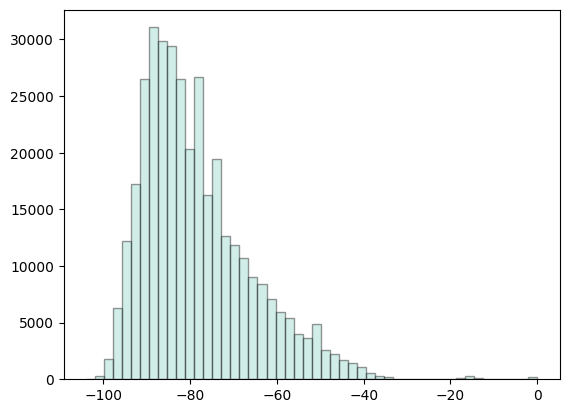

In [45]:
X_train = train_data.iloc[:,:520]
X_train = (X_train
          .replace(to_replace=100,value=np.nan)) # Positive value 100 used if WAP was not detected -> 100인 값 NaN으로 변경
X_stack = X_train.stack(dropna=False)
sns.distplot(X_stack.dropna(),kde = False, hist_kws = dict(edgecolor="k", linewidth=1))

- skewed : need to log-transformation

In [18]:
X_train

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-97.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
sum(X_stack.isnull() == 0)/len(X_stack) # NaN이 아닌 APs 비율

0.03460544947353394

In [27]:
X_train.notnull().sum(axis = 1)

0        17
1        16
2        15
3        16
4         0
         ..
19932     7
19933    16
19934     6
19935    16
19936    16
Length: 19937, dtype: int64

Text(0.5, 0, 'Number of APs in range')

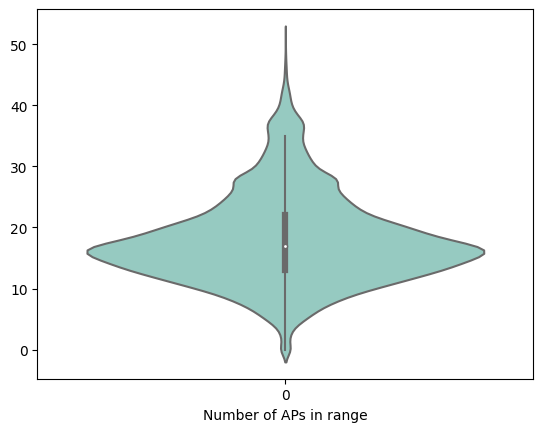

In [39]:
waps_in_range = (X_train
                 .notnull()
                 .sum(axis = 1)) # 각 행에 대한 NaN이 아닌 APs 개수

fig, ax = plt.subplots(1,1)

sns.violinplot(waps_in_range, ax = ax, palette = "Set3")
ax.set_xlabel("Number of APs in range")

In [42]:
waps_in_range.describe()

count    19937.000000
mean        17.994834
std          7.333575
min          0.000000
25%         13.000000
50%         17.000000
75%         22.000000
max         51.000000
dtype: float64

In [43]:
print("Before sample removal:", len(X_train))
X_train = (X_train
           .loc[X_train
                .notnull()
                .any(axis=1),:])
print("After sample removal:", len(X_train))

Before sample removal: 19937
After sample removal: 19861


In [47]:
# Removing columns with all NaN values
all_nan = (X_train
           .isnull()
           .all(axis=0) == False)
filtered_cols = (all_nan[all_nan]
                 .index
                 .values)

print("Before removing predictors with no in-range values", X_train.shape)

X_train = X_train.loc[:,filtered_cols]

print("After removing predictors with no in-range values", X_train.shape)

Before removing predictors with no in-range values (19937, 465)
After removing predictors with no in-range values (19937, 465)


Skewness WAP001    0.479481
WAP002   -0.114668
WAP005   -0.184462
WAP006    1.463631
WAP007    0.786722
            ...   
WAP515   -0.872319
WAP516    0.877139
WAP517    1.491308
WAP518   -0.175775
WAP519    1.732051
Length: 465, dtype: float64


<Axes: >

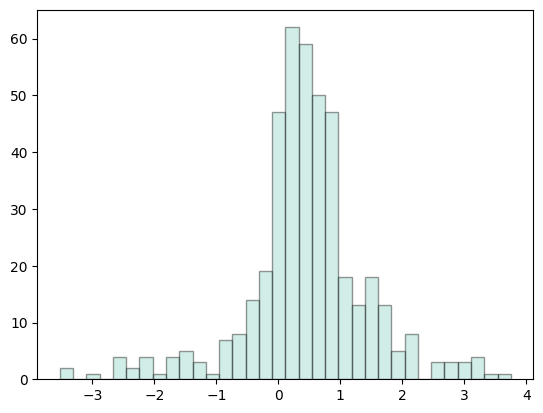

In [52]:
# Finding skewness ignoring out-of-range values
X_skew = X_train.skew() # 각 AP의 치우침 정도
print('Skewness', X_skew)
sns.distplot(X_skew.dropna(),kde=False, hist_kws = dict(edgecolor="k", linewidth=1))

- Skewness를 측정한 값 기준으로 -2~+2는 치우침이 없는 데이터
- Skewed 데이터를 변환하는 이유는 꼬리에 있는 값을 모델에 제대로 학습시키기 위함
- -2 미만은 Negative Skew, +2 초과는 Positive Skew
- Positive Skewness는 오른쪽에 꼬리를 가진(왼쪽에 데이터가 많은) 형태
- Negative Skewness는 왼쪽에 꼬리를 가진(오른쪽에 데이터가 많은) 형태

In [54]:
np.power(10,X_train/10)

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.995262e-10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
np.power(10,X_train/10,).min()

WAP001    1.995262e-10
WAP002    1.000000e-09
WAP005    1.995262e-10
WAP006    1.584893e-10
WAP007    1.258925e-10
              ...     
WAP515    1.995262e-10
WAP516    7.943282e-11
WAP517    7.943282e-11
WAP518    1.995262e-10
WAP519    1.995262e-10
Length: 465, dtype: float64

In [56]:
np.power(10,X_train/10,).apply(min).min()

5.011872336272715e-11

In [60]:
X_exp_train = np.power(10,X_train/10)

abs_min = (X_exp_train.apply(min).min())
print(abs_min)

X_exp_train.fillna(abs_min,inplace=True)

5.011872336272715e-11


In [63]:
X_exp_train.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,...,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11
1,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,...,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11
2,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,1.995262e-10,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,...,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11
3,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,...,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11
4,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,...,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11,5.011872e-11


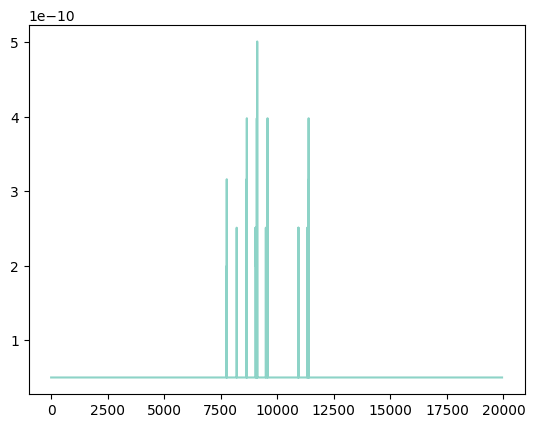

In [61]:
plt.plot(X_exp_train.iloc[:,0])

<Axes: >

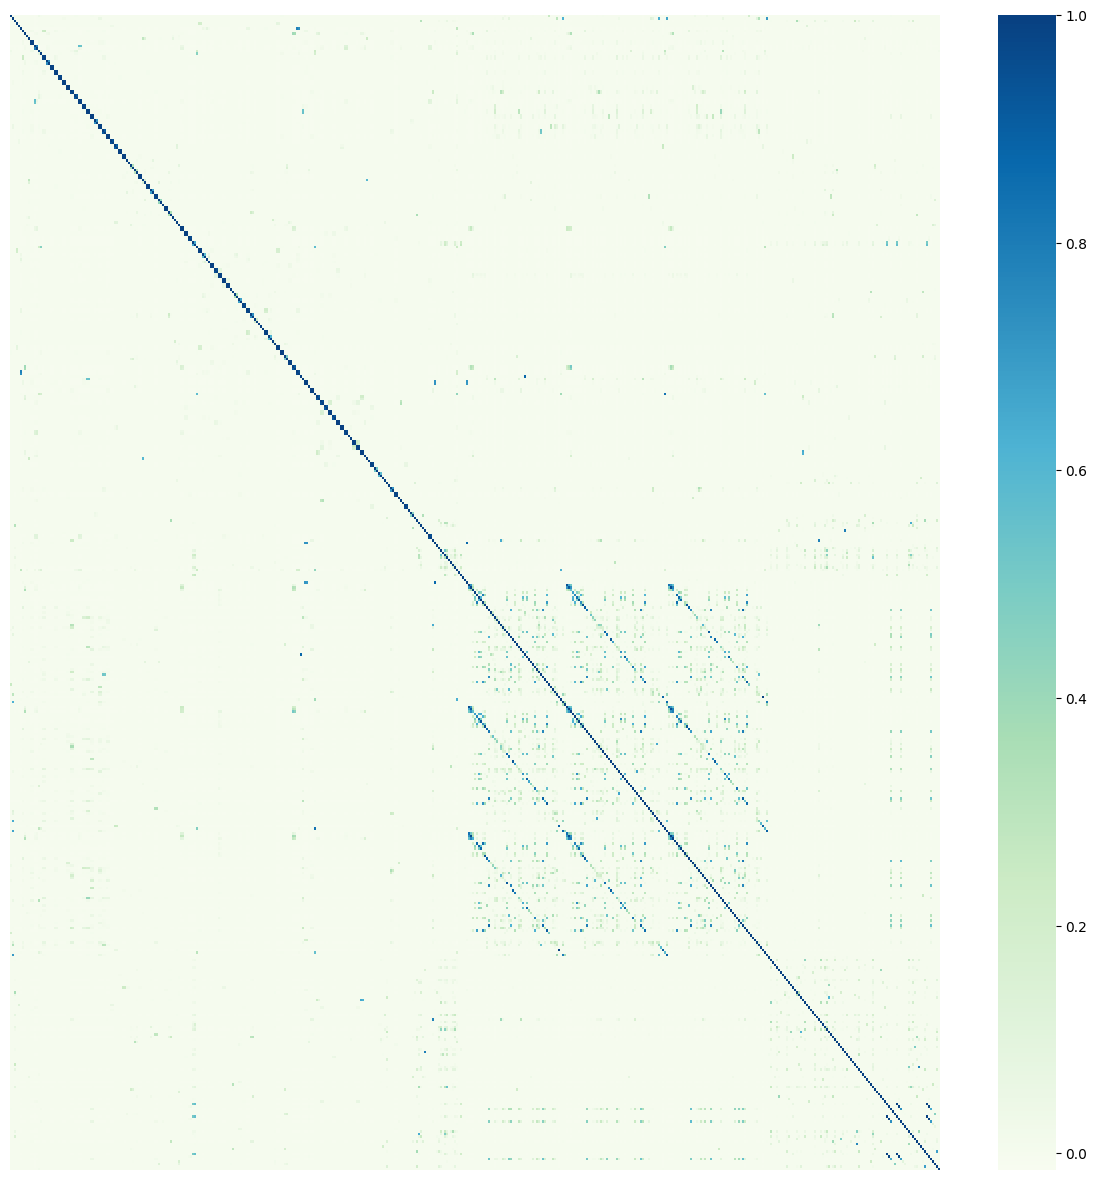

In [66]:
X_train_corr = X_exp_train.corr()

fig = plt.figure(figsize=(15,15))
sns.heatmap(X_train_corr,xticklabels=False, yticklabels=False, cmap = 'GnBu')

##| **?**

1. NaN 값 replace
2. PCA 방법